En el presente documento se estará realizando un análisis de sentimiento a las conferencias diarias que el presidente de México lleva a cabo diariamente. Se utilizarán específicamente las comprendidas entre el 1 de Agosto de 2019 y el 30 de Abril de 2021.

Primero realizamos la importación de las librerías que se estarán utilizando durante el procesamiento.

In [4]:
import string
import matplotlib
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.collocations import *

Por el momento se ha definido la utilización de un archivo de texto como fuente, por lo que procedemos a su apertura.

In [1]:
# Archivo de texto a utilizar como fuente
abrir_archivo = "/home/robert/GitHub/pfmUNIR/archivos/texto_conferencias.txt"

with open(abrir_archivo, 'r') as file:
    text = file.read()

Primero podemos hacer una revisión de frecuencias de palabras, para ello se requieren algunas actividades de preparación del texto como es la separación en palabras, conversión a minúsculas, eliminación de signos de puntuación, etc.

In [16]:
# Separar palabras
tokens = word_tokenize(text)

# Transformar a minúsculas
tokens = [w.lower() for w in tokens]

# Quitar puntuación
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]

# Quitar otros caracteres no alfanuméricos
words = [word for word in stripped if word.isalpha()]

personal_words = ['si','mas', 'buenos', 'buenas', 'días', 'gracias']

# Quitar palabras comunes (stop words)
stop_words = stopwords.words('spanish')
stop_words = stop_words + personal_words
words = [w for w in words if not w in stop_words]

A continuación podemos comenzar a utilizar el texto transformado para realizar algunos análisis, por ejemplo, obtener la lista de las palabras más usuadas y graficarlas.

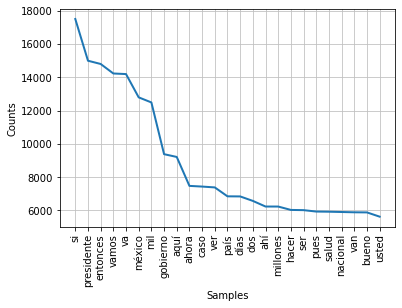

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
# Obtener la frecuencia de las palabras
freq_dist = FreqDist(words)

# Graficar las 25 más utilizadas
freq_dist.plot(25, cumulative=False)


De igual manera podemos realizar un análisis de "Collocations" o palabras que aparecen juntas habitualmente. NLTK ofrece funciones que permiten realizarlo para grupos de 2, 3 o 4 palabras.

Probamos con grupos de 2

In [19]:
bigram_finder = nltk.collocations.BigramCollocationFinder.from_words(words)
bigram_finder.ngram_fd.most_common(5)
bigram_finder.ngram_fd.tabulate(5)

trigram_finder = nltk.collocations.TrigramCollocationFinder.from_words(words)
trigram_finder.ngram_fd.most_common(5)
trigram_finder.ngram_fd.tabulate(5)

quadgram_finder = nltk.collocations.QuadgramCollocationFinder.from_words(words)
quadgram_finder.ngram_fd.most_common(5)
quadgram_finder.ngram_fd.tabulate(5)


('señor', 'presidente')     ('mil', 'millones')   ('millones', 'pesos')    ('ciudad', 'méxico') ('guardia', 'nacional') 
                   4013                    2594                    2278                    1801                    1657 
           ('mil', 'millones', 'pesos') ('comisión', 'federal', 'electricidad')          ('pesos', 'centavos', 'litro')    ('fiscalía', 'general', 'república')      ('permiso', 'señor', 'presidente') 
                                   1481                                     665                                     518                                     500                                     403 
     ('andrés', 'manuel', 'lópez', 'obrador')      ('pesos', 'centavos', 'litro', 'margen') ('instituto', 'mexicano', 'seguro', 'social')   ('presidente', 'andrés', 'manuel', 'lópez')           ('dos', 'mil', 'millones', 'pesos') 
                                          242                                           236                                  

In [6]:
from sentiment_analysis_spanish import sentiment_analysis
import pandas as pd

sentiment = sentiment_analysis.SentimentAnalysisSpanish()

sentencias = sent_tokenize(text)

prob_sentimiento = []

for s in sentencias:
    prob_sentimiento.append([s, sentiment.sentiment(s)])

df = pd.DataFrame(prob_sentimiento, columns=['frase', 'sentiment'])
df.sort_values(by='sentiment', ascending=False)

/home/robert/anaconda3/envs/pfm-unir/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/robert/anaconda3/envs/pfm-unir/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


,frase,sentiment
134701,Es muy importante señalar que este campo está ...,1.000000e+00
6383,Vamos a poder llegar al aeropuerto ‘Felipe Áng...,1.000000e+00
6387,Se va a poder ir desde el centro hasta el aero...,1.000000e+00
140261,"Visitamos la ciudad de Mérida y ahí, además de...",1.000000e+00
171793,Y por primera vez estamos trabajando de manera...,1.000000e+00
...,...,...
44610,Hoy nos estaban informando que incluso ya se h...,7.605222e-40
191592,"Ah, vamos viendo la nota de la fiscalía, que e...",4.728016e-41
65974,Vamos a trabajar con el marco jurídico actual ...,4.192622e-41
145371,Lo que quiero es que ya en dos años no se pued...,1.795890e-41


In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("finiteautomata/beto-sentiment-analysis")

model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/beto-sentiment-analysis")



Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

NameError: name 'sent_tokenize' is not defined

In [5]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

sentencias = sent_tokenize(text)

prob_sentimiento = []

for s in sentencias:
    prob_sentimiento.append([s, classifier(s)])

KeyboardInterrupt: 